# EDA
### Kicker Training Set

* df1_raw is untouched
* Lemons - DF where IsBadBuy is true. aka the car was a lemon.

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine



In [3]:
df1_raw = pd.read_csv("./kicker_training.csv")
lemons = df1_raw[df1_raw["IsBadBuy"] == 1]
good = df1_raw[df1_raw["IsBadBuy"] == 0]

df1_raw.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
#engine = create_engine('postgresql://ellenkim@localhost:5432/sample_db')
#df1_raw.to_sql("df1", engine)


In [5]:
total = float(len(df1_raw))
lemon_total = float(len(lemons))

print total
print lemon_total
print (lemon_total/total*100),"% of all cars in this dataset are Lemons."

72983.0
8976.0
12.2987545045 % of all cars in this dataset are Lemons.


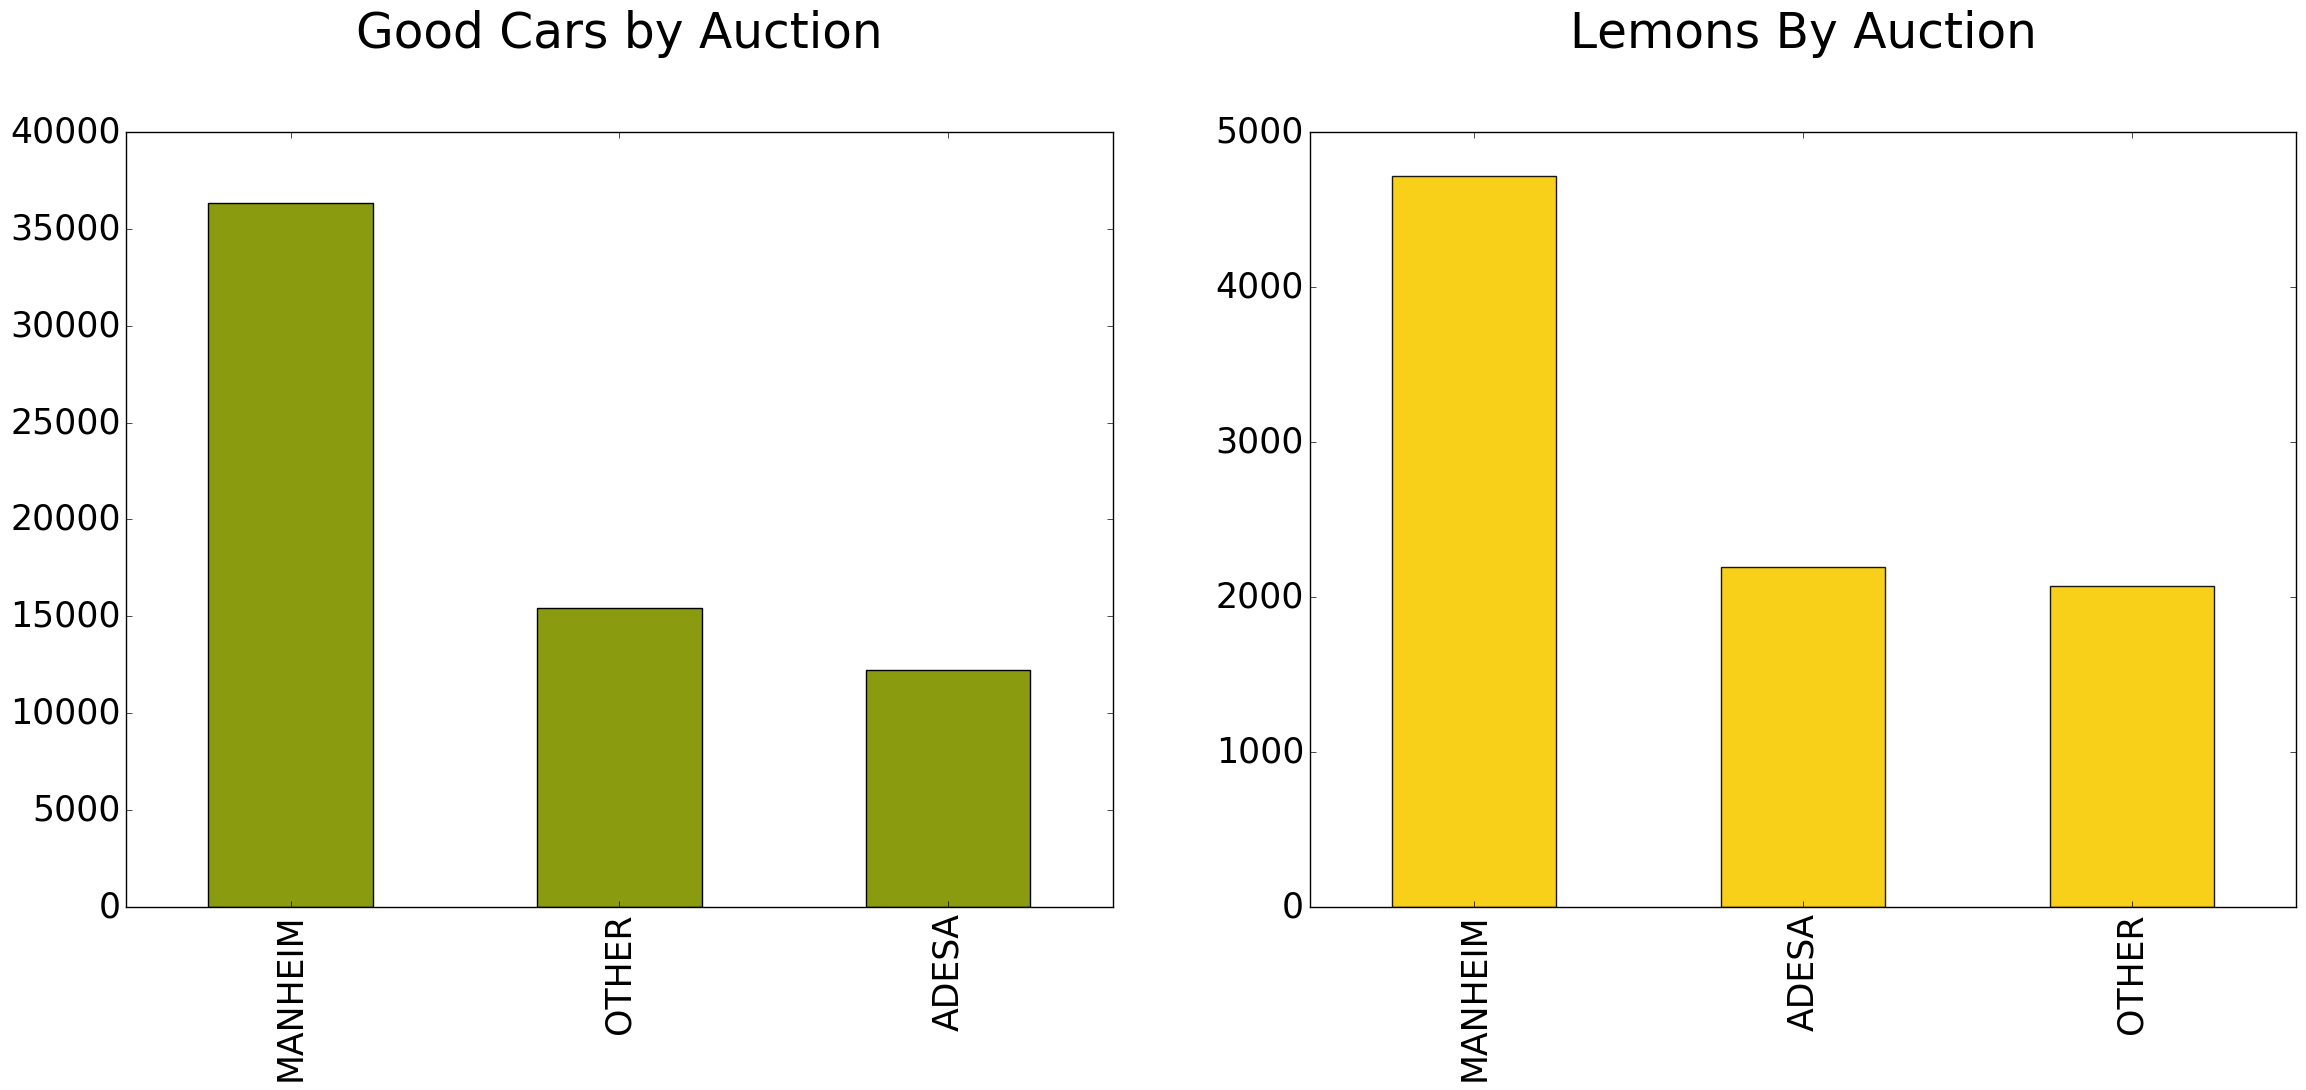

In [6]:
# Plot distribution of total inventory vs. distibution of lemons

import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(28,10))

good["Auction"].value_counts().plot(kind="bar", ax=ax[0], color="#8A9B0F")

ax[0].set_title("Good Cars by Auction", fontsize="35", y=1.1)
ax[0].tick_params(axis='both', which='major', labelsize=25)

lemons["Auction"].value_counts().plot(kind="bar", ax=ax[1], color="#F8CA00", alpha=0.9)
ax[1].set_title("Lemons By Auction", fontsize="35", y = 1.1)
ax[1].tick_params(axis='both', which='major', labelsize=25)


### FINDINGS
- The ratio of lemons is proportional to the total number of cars that comes from each auction company.

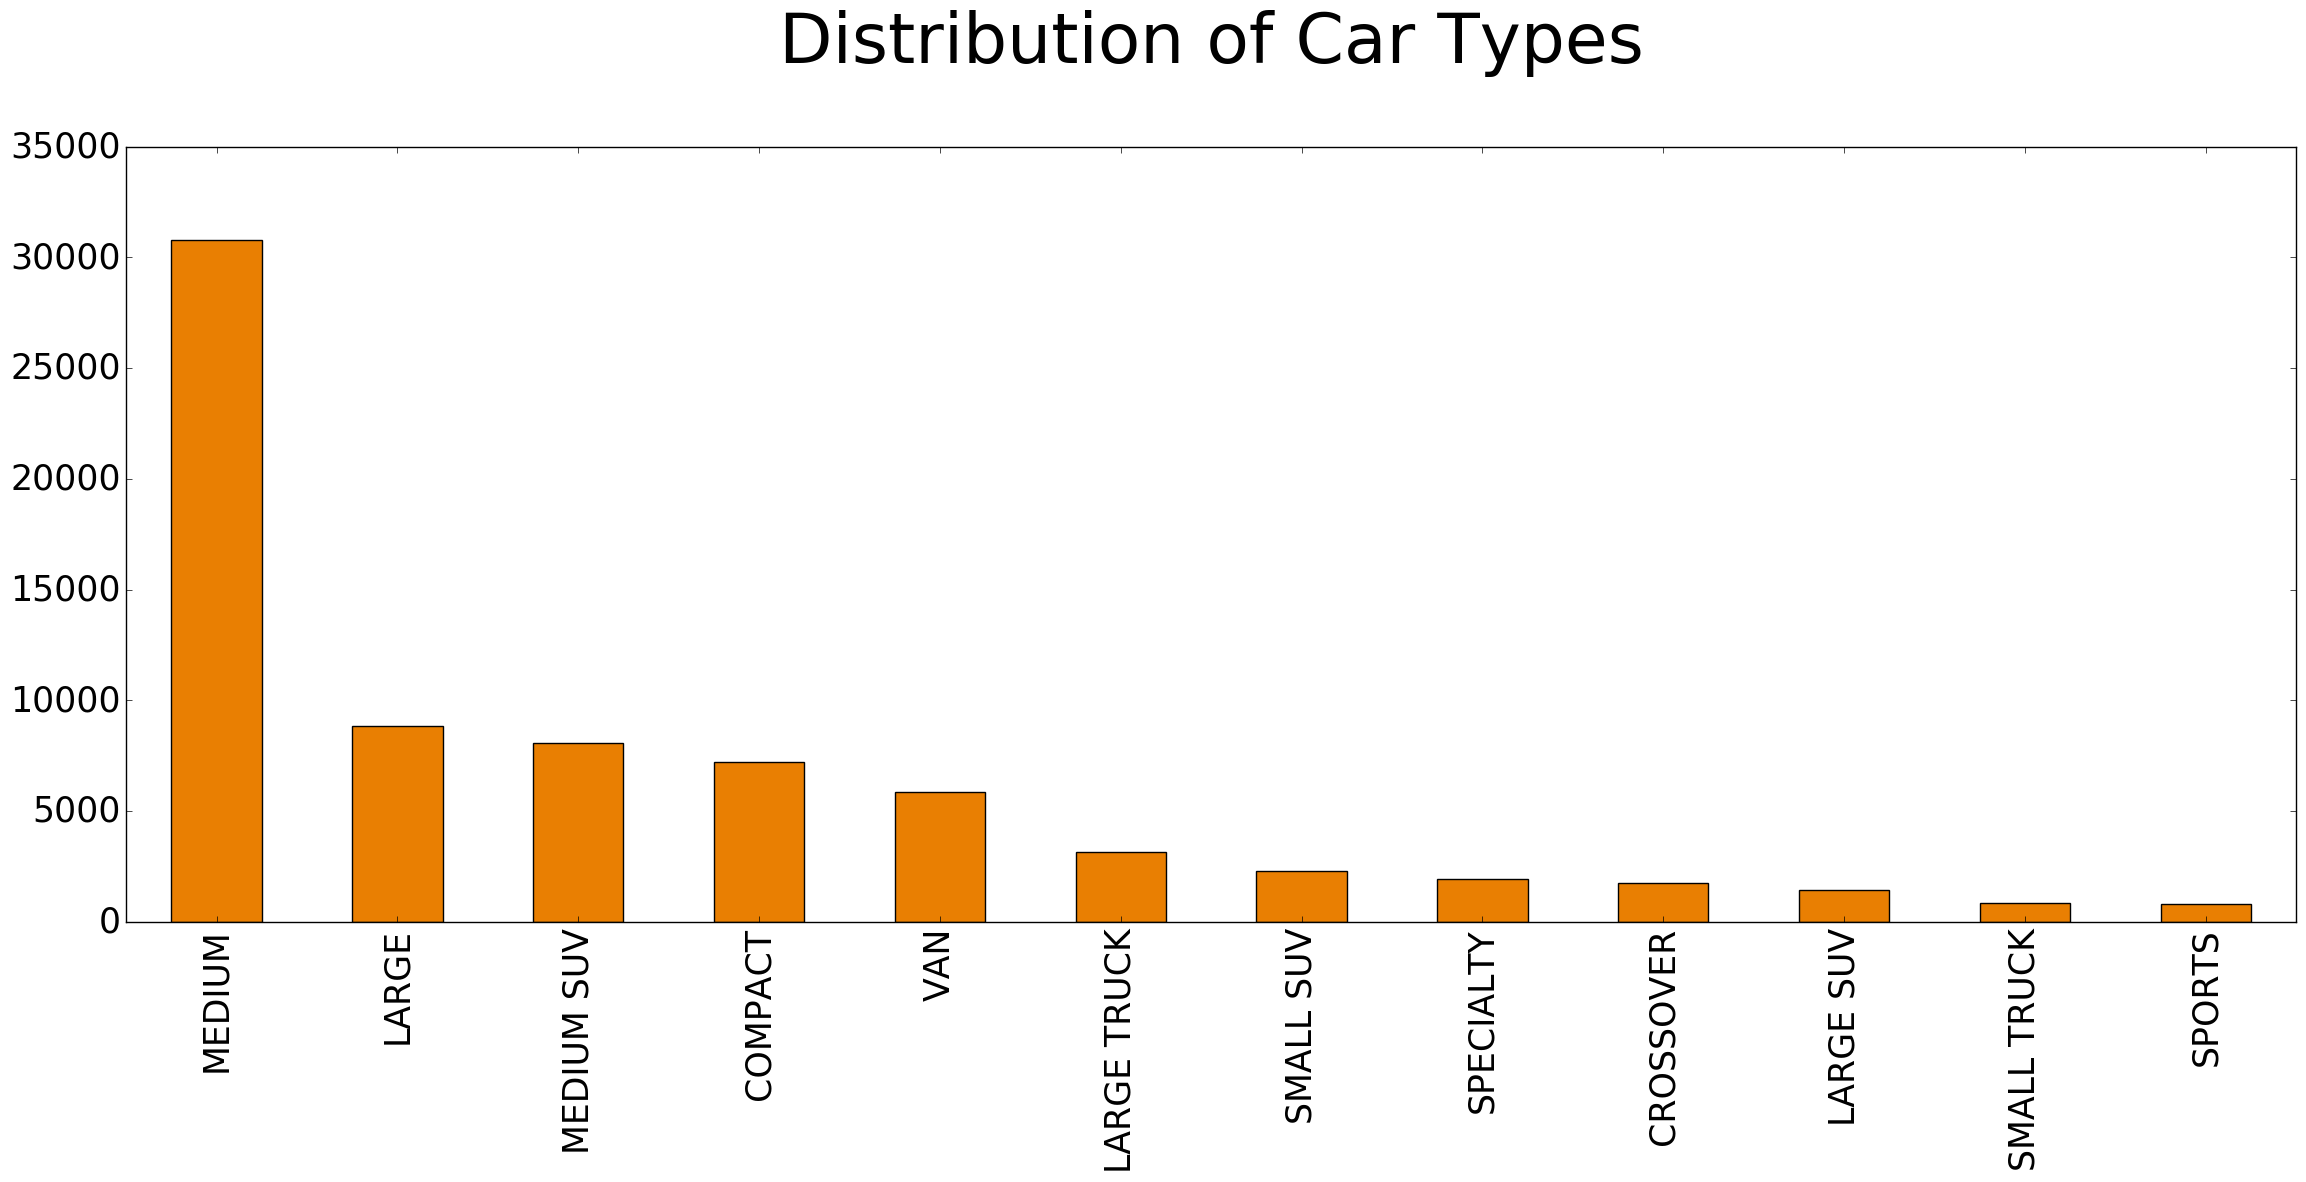

In [7]:
# find distribution by car type

fig = plt.subplots( figsize=(28,10))
df1_raw["Size"].value_counts().plot(kind="bar",color="#E97F02")
plt.title("Distribution of Car Types", size= 50, y=1.1)
plt.tick_params(axis='both', which='major', labelsize=25)




## DATA DICTIONARY

Medium = Standard sedan (Nissan Altima)<br /> 
Large = Sedan: room for five adults and a large trunk (ie. Chev Monte Carlo)<br /> 
Meduim SUV = sports utility vehicle (ie. Ford Escape)

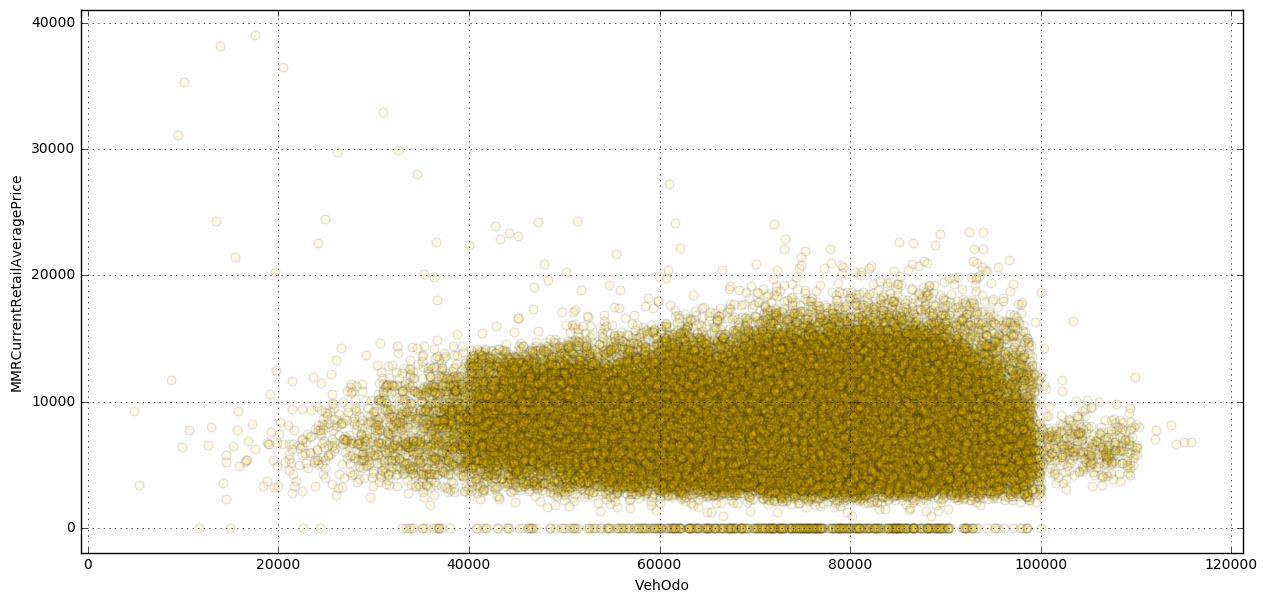

In [8]:
df1_raw.plot(x='VehOdo', y='MMRCurrentRetailAveragePrice', kind='scatter', color="#F8CA00",
        figsize=(15,7), s=40, alpha=.1)
plt.axis('tight')
plt.grid(True)

### FINDINGS
- Most of the cars sold are between \$2,000 and \$13,000. Most cars have between 20k to 100k miles on the odometer. 

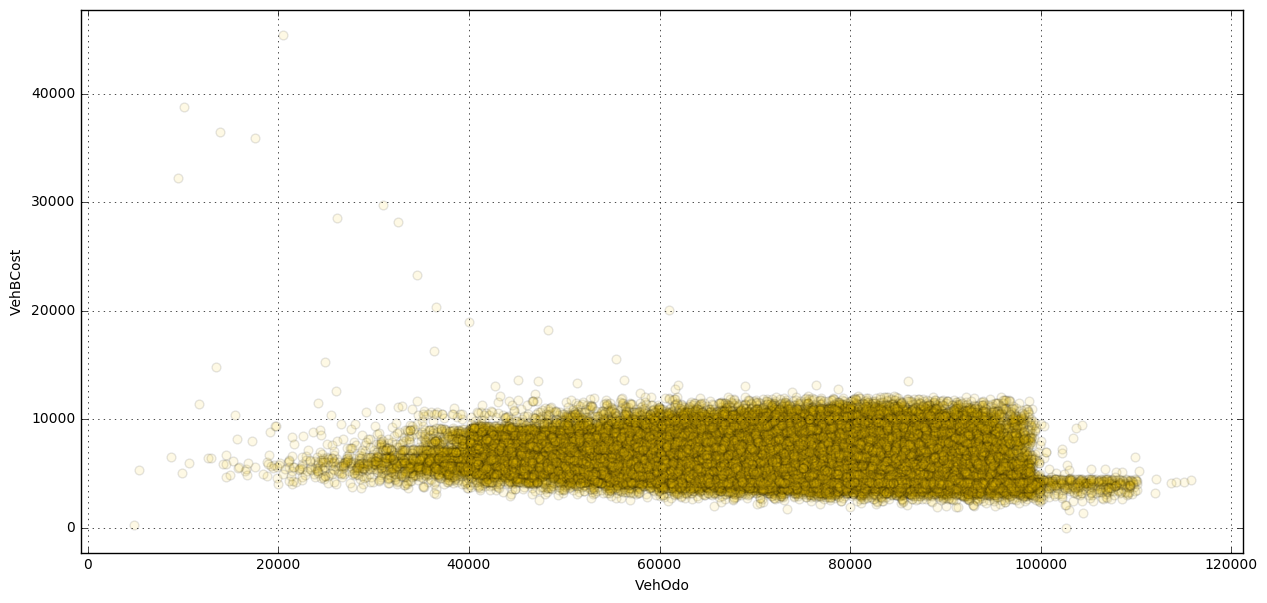

In [9]:
df1_raw.plot(x='VehOdo', y='VehBCost', kind='scatter', color="#F8CA00",
        figsize=(15,7), s=40, alpha=.1)
plt.axis('tight')
plt.grid(True)

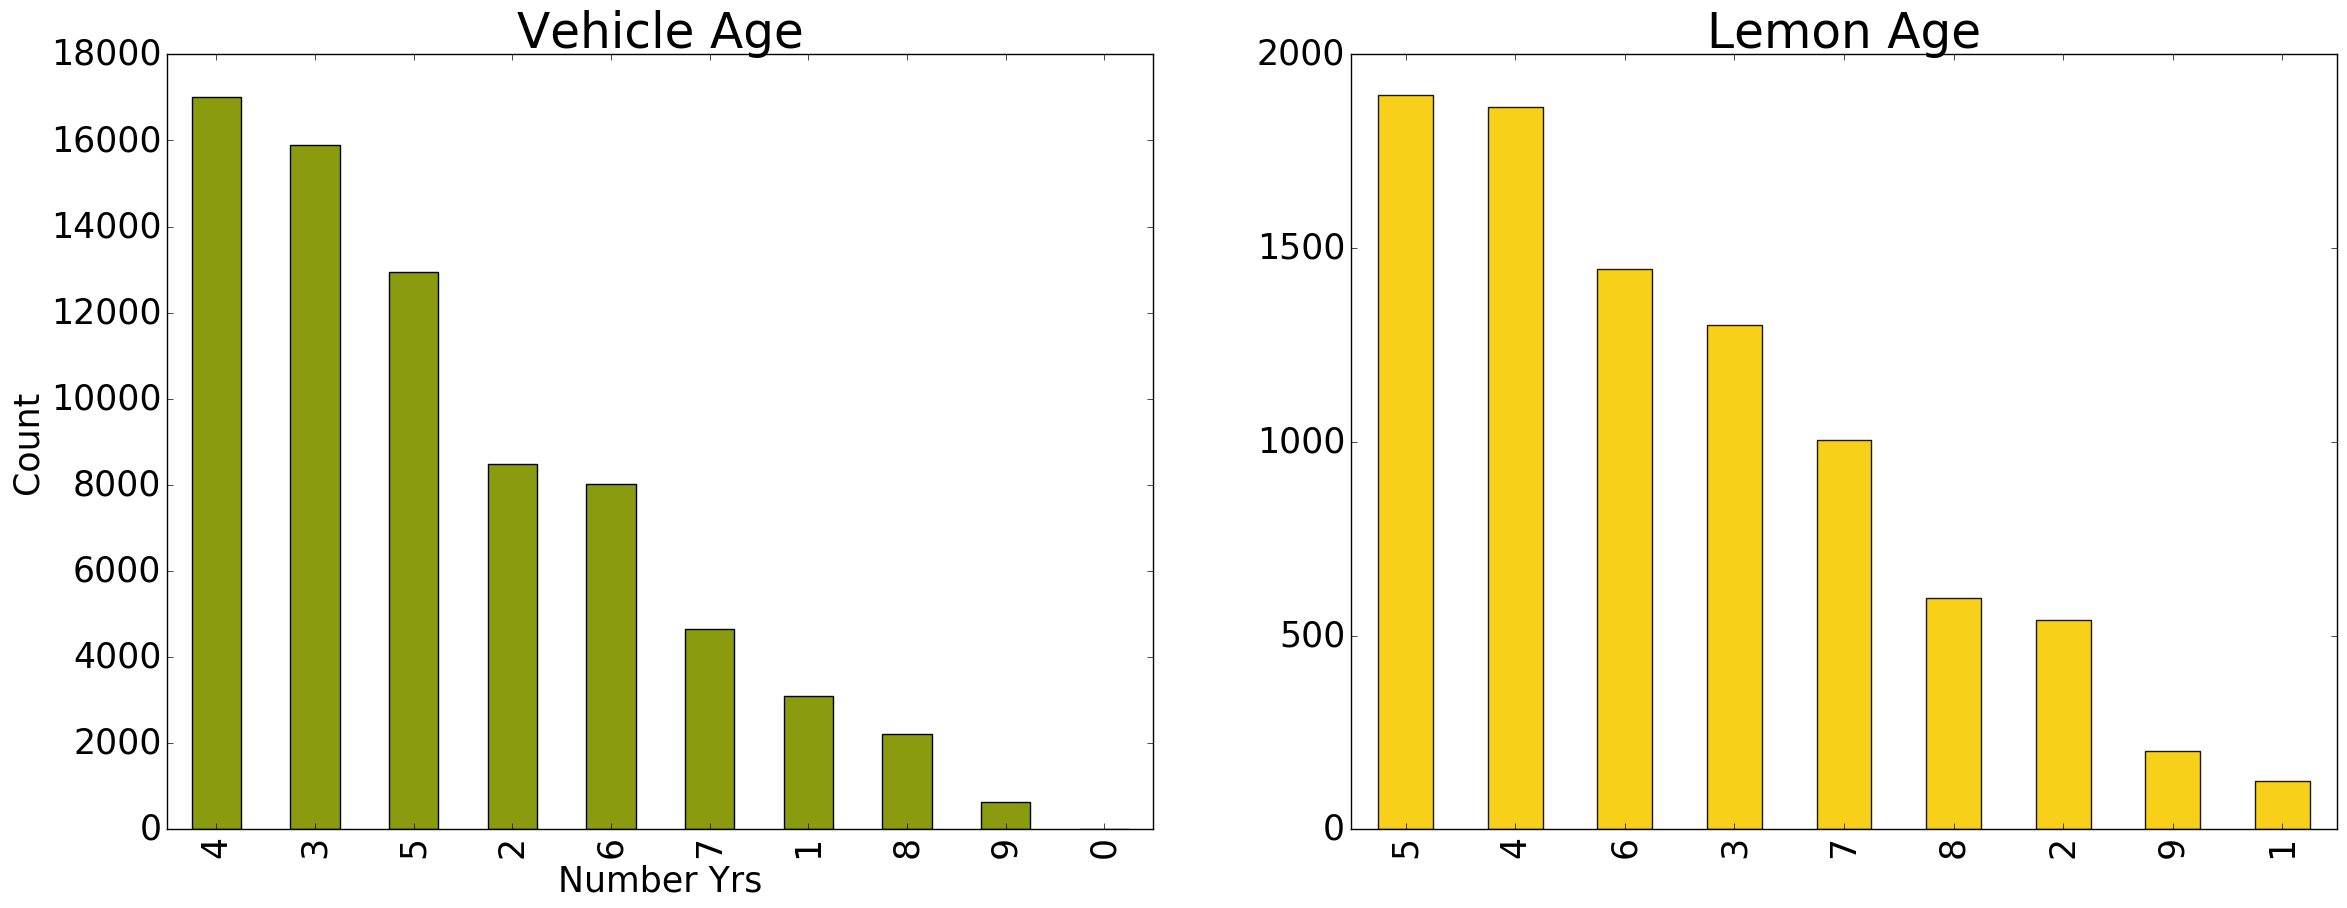

In [11]:
fig, ax = plt.subplots(1,2, figsize=(28,10))

df1_raw["VehicleAge"].value_counts().plot(kind="bar", ax=ax[0], color="#8A9B0F")

ax[0].set_title("Vehicle Age", fontsize="35")
ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[0].set_xlabel('Number Yrs', fontsize=25)
ax[0].set_ylabel('Count', fontsize=25)


lemons["VehicleAge"].value_counts().plot(kind="bar", ax=ax[1], color="#F8CA00", alpha=0.9)
ax[1].set_title("Lemon Age", fontsize="35")
ax[1].tick_params(axis='both', which='major', labelsize=25)




### FINDINGS
 - most common age for all cars in order: 4,3,5,2,6
 - most common age for Lemon cars in order: 5,4,6,3,7

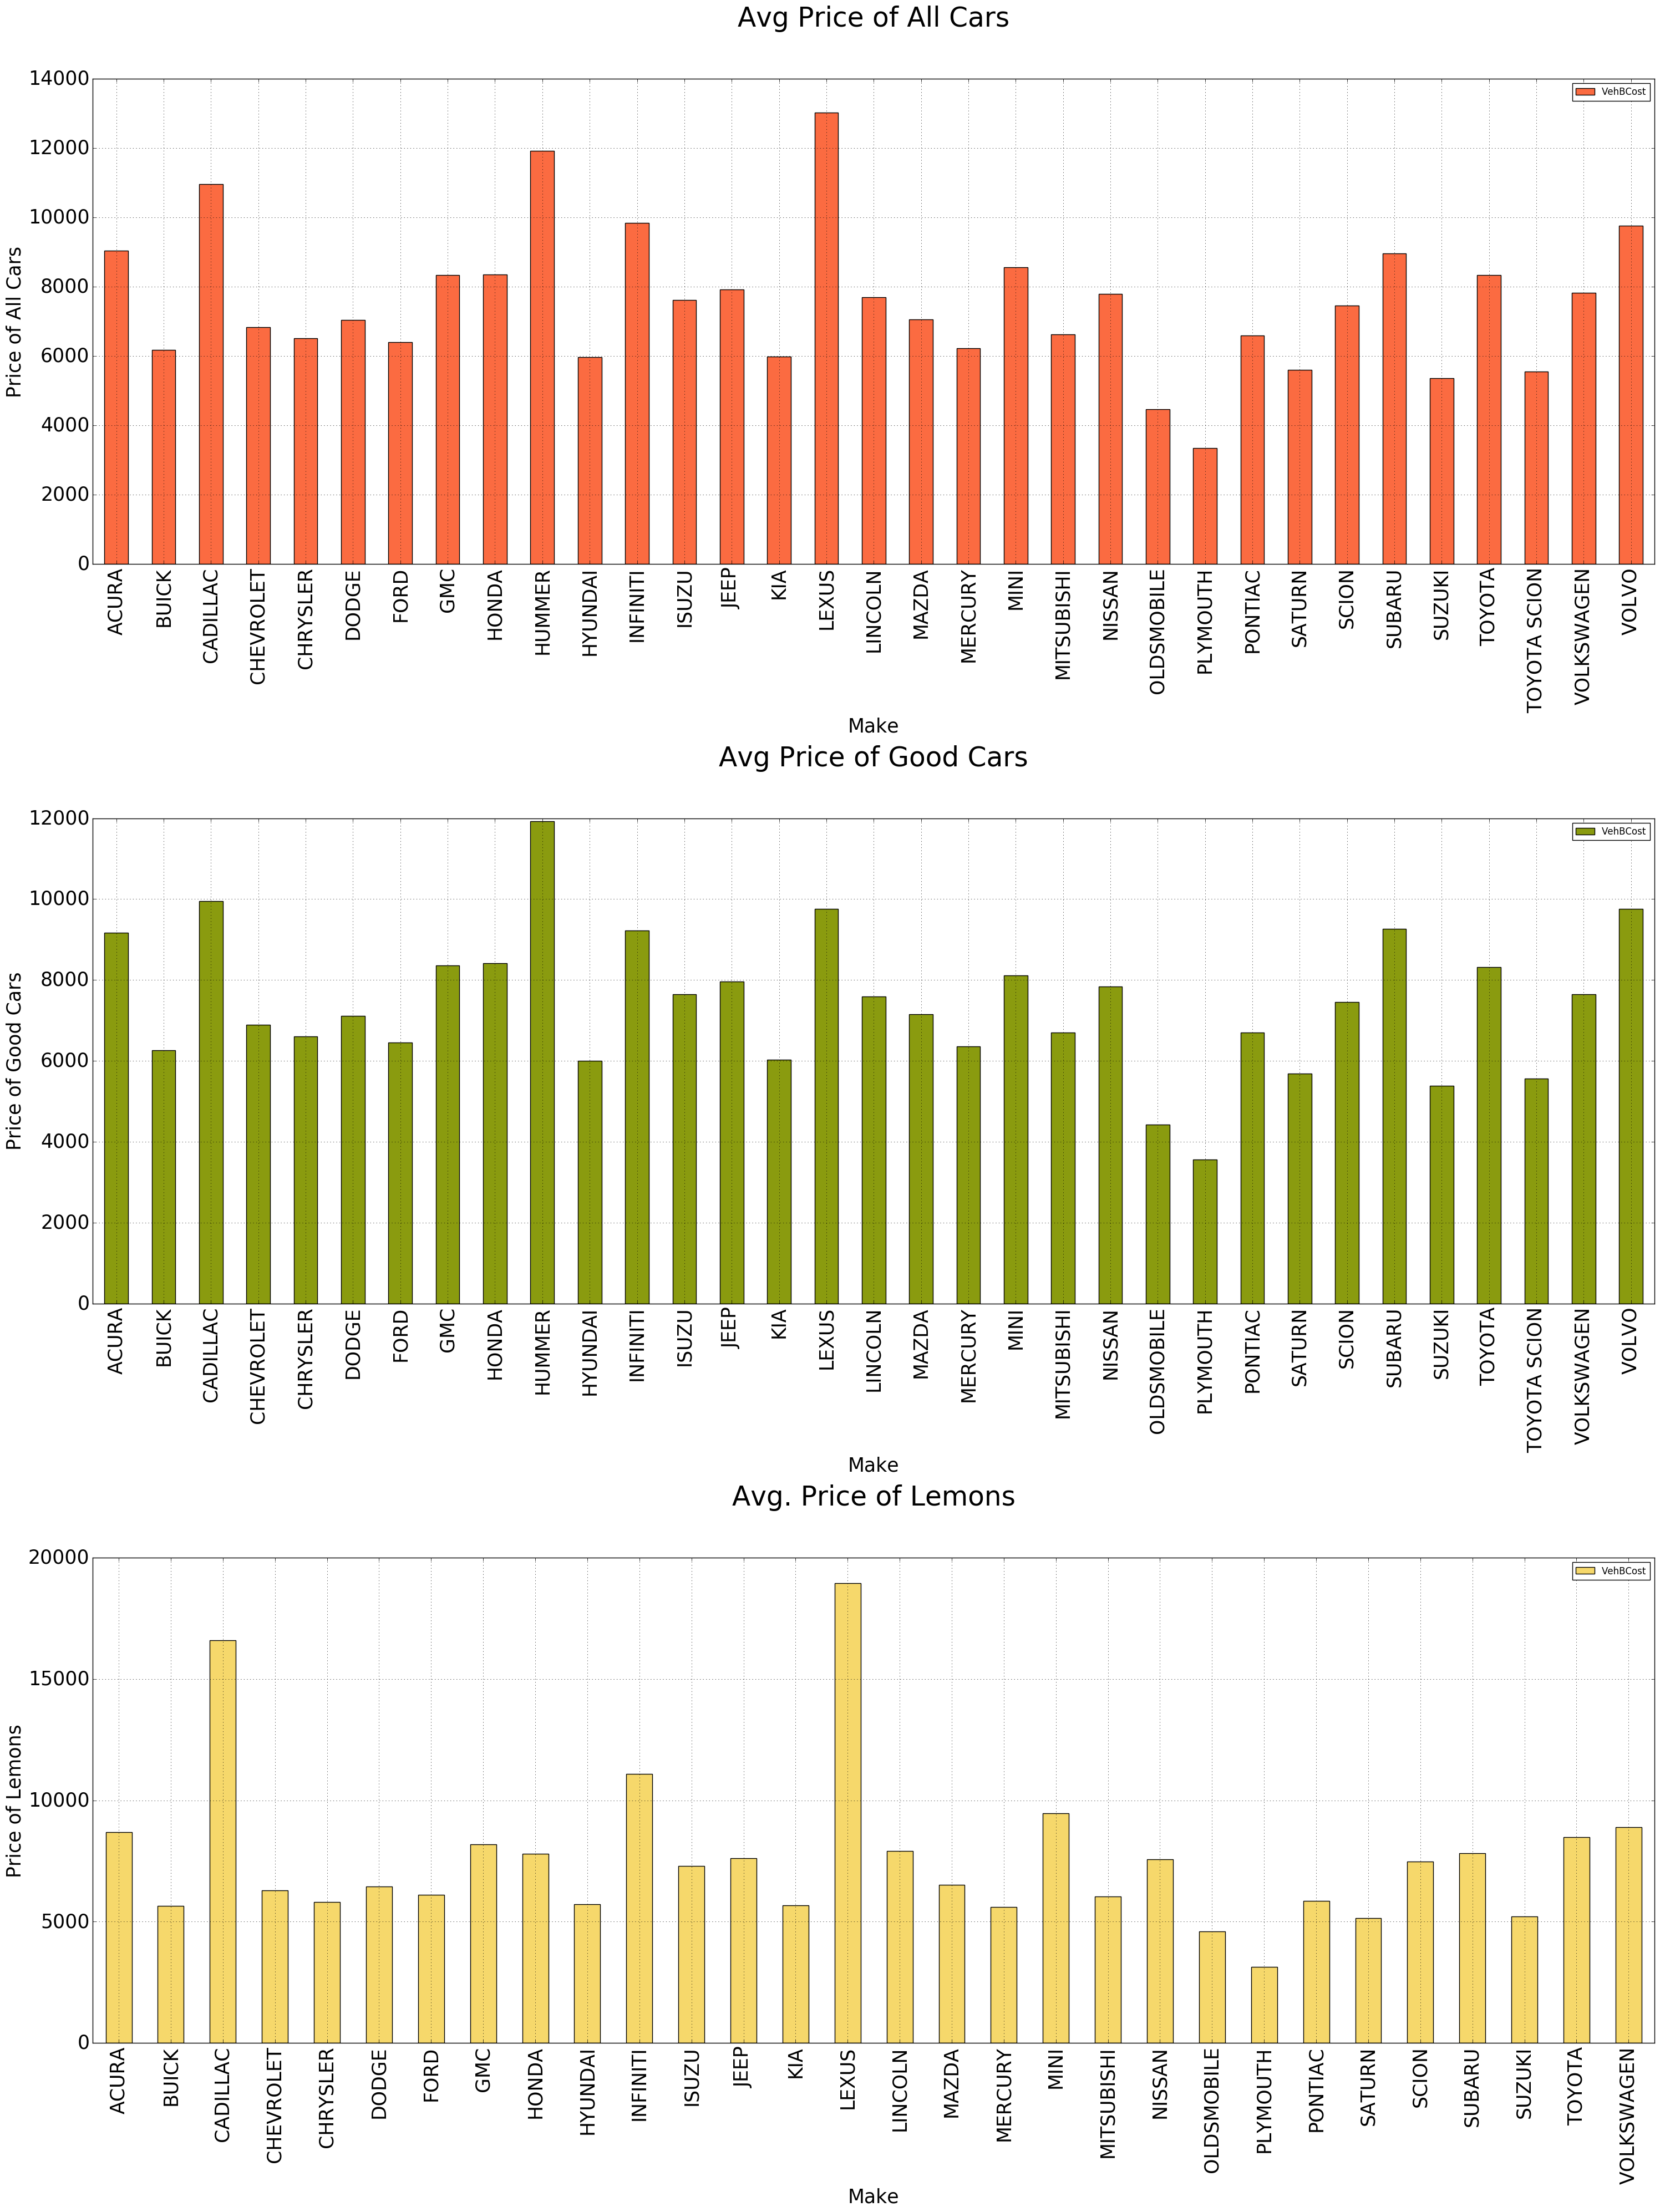

In [12]:

# average of all car prices ( lemons and good)
df_avg_prices = df1_raw.ix[:,[6,31]]
pv_avg_prices = pd.pivot_table(df_avg_prices, index= "Make", aggfunc=np.mean)

# indexing good cars and make
# df "good" is separate tables with non-lemons
df_good_prices = good.ix[:,[6,31]]
# pivot of make and average cost
pv_good_prices = pd.pivot_table(df_good_prices, index= "Make", aggfunc=np.mean)

# indexing and pivoting lemons
df_lemons_price = lemons.ix[:,[6,31]]
pv_lemons_price = pd.pivot_table(df_lemons_price, index= "Make", aggfunc=np.mean)


fig, ax = plt.subplots(3,1, figsize=(28,100))
# plotting average of all cars- good and bad

pv_avg_prices.plot(kind="bar",ax=ax[0], figsize=(100,40), color="#FB6B41")

ax[0].set_title("Avg Price of All Cars", fontsize="35", y=1.1)
ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[0].set_xlabel('Make', fontsize=25)
ax[0].set_ylabel('Price of All Cars', fontsize=25)
ax[0].grid(True)

#plotting average price of good cars
pv_good_prices.plot(kind="bar",ax=ax[1], figsize=(50,20), color="#8A9B0F")

ax[1].set_title("Avg Price of Good Cars", fontsize="35", y=1.1)
ax[1].tick_params(axis='both', which='major', labelsize=25)
ax[1].set_xlabel('Make', fontsize=25)
ax[1].set_ylabel('Price of Good Cars', fontsize=25)
ax[1].grid(True)

# plotting average price of lemons
pv_lemons_price.plot(kind="bar",ax=ax[2], figsize=(30,40), color="#F6D86B")
ax[2].set_title("Avg. Price of Lemons", fontsize="35", y=1.1)
ax[2].tick_params(axis='both', which='major', labelsize=25)
ax[2].set_xlabel('Make', fontsize=25)
ax[2].set_ylabel('Price of Lemons', fontsize=25)
ax[2].grid(True)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)

### FINDINGS
- Lexus and Calidillac's are drastically more expensive when they're lemons, than not.
- Cars that are slightly more expensive when they're lemons than not: Infiniti, Mini

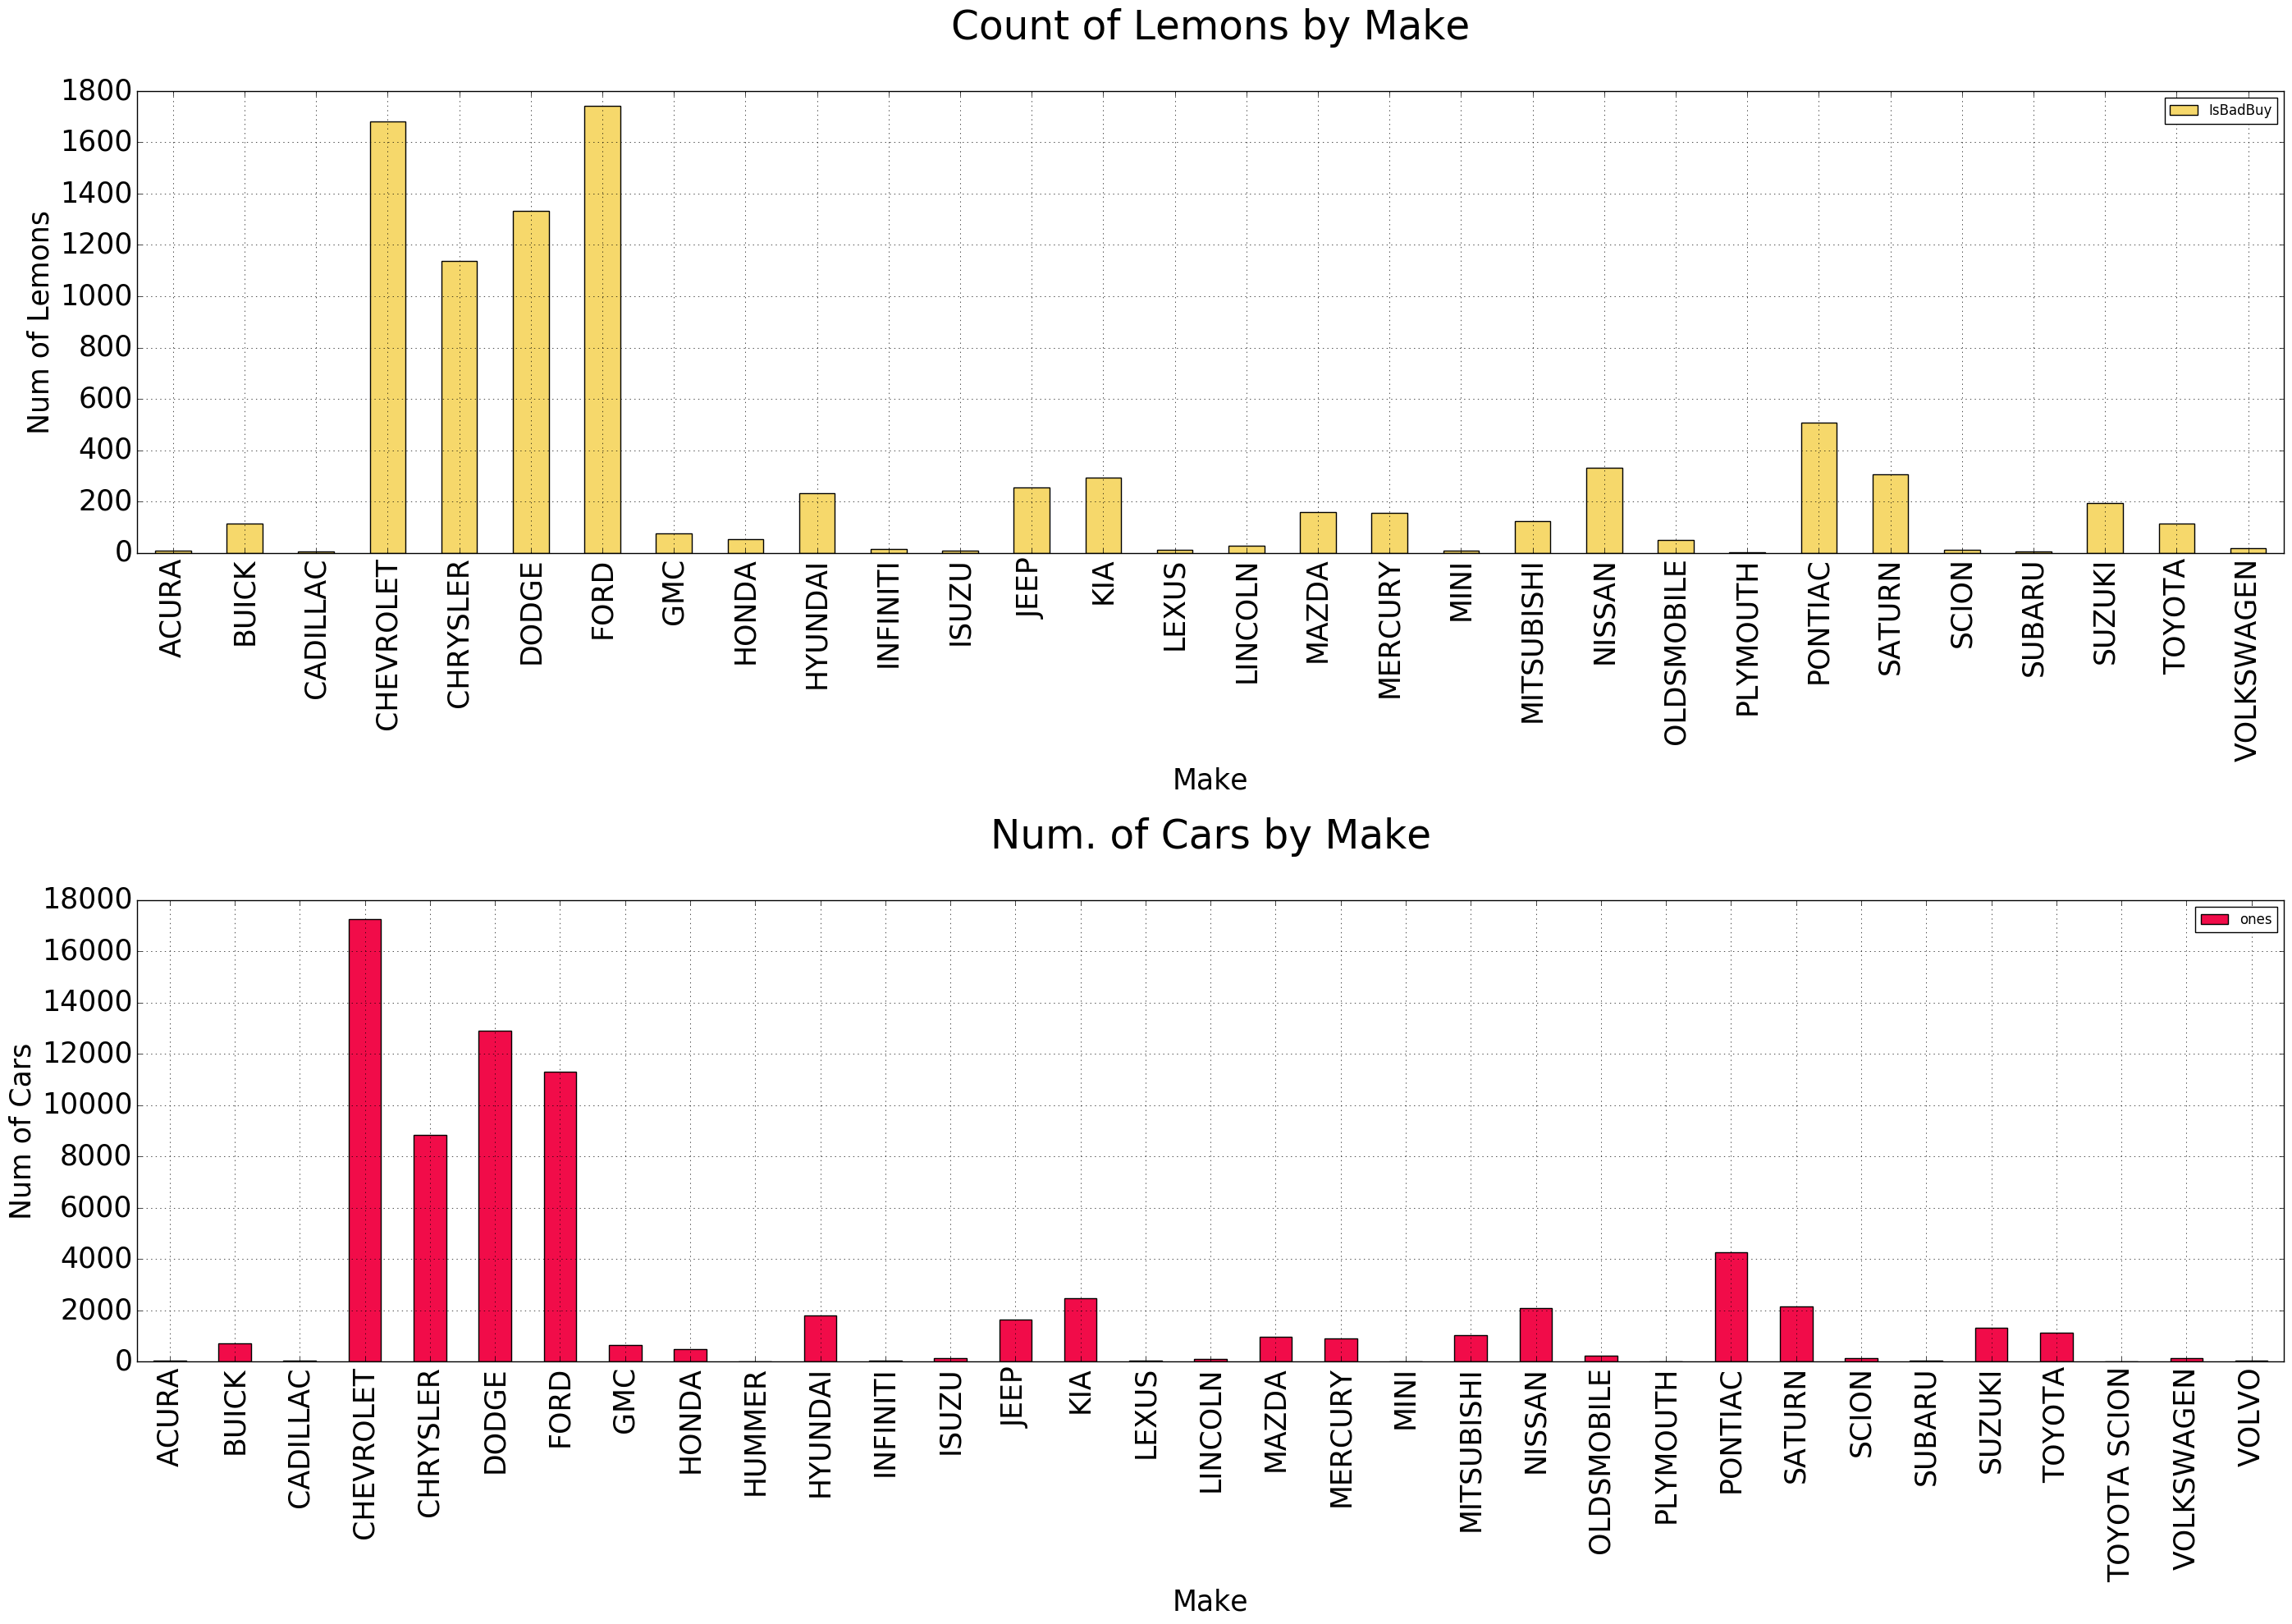

In [13]:
# Count of lemons per make

df_lemon_make= lemons.ix[:,[1,6]]
df_lemon_make.head()
pv_lemon_make = pd.pivot_table(df_lemon_make, index= "Make", aggfunc=sum)
pv_lemon_make.head()

# Count of all cars per make
df1_raw.loc[:,"ones"] = [1 for row in df1_raw.loc[:,"RefId"]]
df1_raw
df_make_count = df1_raw.ix[:, ["Make", "ones"]]
pv_make_count = pd.pivot_table(df_make_count, index = "Make", aggfunc= sum)



# Plotting
fig, ax = plt.subplots(2,1, figsize=(28,40))

pv_lemon_make.plot(kind="bar",ax=ax[0], figsize=(28,20), color="#F6D86B")
ax[0].set_title("Count of Lemons by Make", fontsize="35", y=1.1)
ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[0].set_xlabel('Make', fontsize=25)
ax[0].set_ylabel('Num of Lemons', fontsize=25)
ax[0].grid(True)


pv_make_count.plot(kind="bar", ax=ax[1],figsize=(28,20), color="#F10C49")
ax[1].set_title("Num. of Cars by Make", fontsize="35", y=1.1)
ax[1].tick_params(axis='both', which='major', labelsize=25)
ax[1].set_xlabel('Make', fontsize=25)
ax[1].set_ylabel('Num of Cars', fontsize=25)
ax[1].grid(True)


plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)

### FINDINGS
- Car Make with the most lemons are: Ford, Chevrolet, Dodge, Chrysler
- Car Make with lease lemons: Plymouth, Cadillac,Subaru, Mini, Isuze.
- However, these makes may have less lemons because they may have less sales in general.
- The second bar graph below shows that there is a proportional relationship between the number of lemons and the total number of cars per make. (~10% of total cars per make are lemons)

In [11]:
#import pickle
#with open('lemons.pkl', 'w') as picklefile:
#    pickle.dump(lemons, picklefile)

In [12]:
#with open('df1_raw.pkl', 'w') as picklefile:
#    pickle.dump(df1_raw, picklefile)